***1. Загрузите в колаб файлы по оценкам (ratings) и фильмам (movies) и создайте на их основе pandas-датафреймы***

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
movies = pd.read_csv('u.item.csv', sep='|', header=None, encoding='cp1250', 
              names=["item_id",  "movie_title" , "release_date" , "video_release_date" ,
              "IMDb_URL" , "unknown" , "Action" , "Adventure" , "Animation" ,
              "Children's" , "Comedy" , "Crime" , "Documentary" , "Drama" , "Fantasy" ,
              "Film-Noir" , "Horror" , "Musical" , "Mystery" , "Romance" , "Sci-Fi" ,
              "Thriller" , "War" , "Western"])
movies.head()

,item_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   item_id             1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [ ]:
# смотрим пропуски
movies.isna().sum()

item_id                  0
movie_title              0
release_date             1
video_release_date    1682
IMDb_URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children's               0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [ ]:
movies.release_date.fillna(movies.release_date.mode()[0], inplace=True)

In [ ]:
movies.drop(columns=['video_release_date', 'IMDb_URL'], inplace=True)
movies.head()

,item_id,movie_title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
ratings = pd.read_csv('u.data.csv', sep="\t", header=None, encoding='cp1250', 
                      names=["user_id", "item_id", "rating", "timestamp"])
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


***2. Средствами Pandas, используя dataframe ratings, найдите id пользователя, поставившего больше всего оценок***

In [ ]:
user_top = ratings.groupby('user_id').count().sort_values(by='item_id', ascending=False)\
          .drop(columns=['rating', 'timestamp']).rename(columns={'item_id': 'total'}).head(1)
user_top

,total
user_id,
405,737


***3. Оставьте в датафрейме ratings только те фильмы, которые оценил данный пользователь***

In [ ]:
ratings_top = ratings[ratings['user_id'] == 405]
ratings_top.head()

,user_id,item_id,rating,timestamp
12276,405,56,4,885544911
12383,405,592,1,885548670
12430,405,1582,1,885548670
12449,405,171,1,885549544
12460,405,580,1,885547447


***4. Для построения модели нам нужны признаки.*** 
В качестве таковых будем использовать:
* Год выхода
* Жанры
* Общее количество оценок
* Суммарную оценку


In [ ]:
# строки до merge
ratings_top.shape

(737, 4)

In [ ]:
# добавим данные по жанрам
ratings_top = ratings_top.merge(movies[['item_id', "movie_title", 'release_date',
              "unknown", "Action", "Adventure", "Animation",
              "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
              "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi",
              "Thriller", "War", "Western"]], how='left')
ratings_top.head()

,user_id,item_id,rating,timestamp,movie_title,release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,405,56,4,885544911,Pulp Fiction (1994),01-Jan-1994,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,405,592,1,885548670,True Crime (1995),01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,405,1582,1,885548670,T-Men (1947),01-Jan-1947,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,405,171,1,885549544,Delicatessen (1991),01-Jan-1991,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,405,580,1,885547447,"Englishman Who Went Up a Hill, But Came Down a...",01-Jan-1995,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
#получим из даты выхода фильма год выхода
ratings_top['release_year'] = pd.DatetimeIndex(ratings_top['release_date']).year
ratings_top.drop(columns=['timestamp', 'release_date'], inplace=True)
ratings_top

,user_id,item_id,rating,movie_title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,405,56,4,Pulp Fiction (1994),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1994
1,405,592,1,True Crime (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1995
2,405,1582,1,T-Men (1947),0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1947
3,405,171,1,Delicatessen (1991),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1991
4,405,580,1,"Englishman Who Went Up a Hill, But Came Down a...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,405,375,1,Showgirls (1995),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
733,405,445,4,"Body Snatcher, The (1945)",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1945
734,405,1246,1,Bushwhacked (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995
735,405,196,1,Dead Poets Society (1989),0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1989


In [ ]:
# уберем лишние колонки
ratings = ratings[['item_id', 'rating']]
ratings.head()

,item_id,rating
0,242,3
1,302,3
2,377,1
3,51,2
4,346,1


In [ ]:
# общее количество оценок на фильм
count_of_ratings = ratings.groupby('item_id', as_index=False).count().rename(columns={'rating': 'count_of_ratings'})
count_of_ratings

,item_id,count_of_ratings
0,1,452
1,2,131
2,3,90
3,4,209
4,5,86
...,...,...
1677,1678,1
1678,1679,1
1679,1680,1
1680,1681,1


In [ ]:
# суммарная оценка фильма пользователями
summary_rating = ratings.groupby('item_id', as_index=False).agg({'rating':'sum'}).rename(columns={'rating': 'summary_rating'})
summary_rating.head()


,item_id,summary_rating
0,1,1753
1,2,420
2,3,273
3,4,742
4,5,284


In [ ]:
ratings_top = ratings_top.merge(count_of_ratings, on='item_id', how='left').merge(summary_rating, on='item_id', how='left')
ratings_top.head()

,user_id,item_id,rating,movie_title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year,count_of_ratings,summary_rating
0,405,56,4,Pulp Fiction (1994),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1994,394,1600
1,405,592,1,True Crime (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1995,9,30
2,405,1582,1,T-Men (1947),0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1947,1,1
3,405,171,1,Delicatessen (1991),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1991,65,252
4,405,580,1,"Englishman Who Went Up a Hill, But Came Down a...",0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1995,32,108


In [ ]:
# строки после merge
ratings_top.shape

(737, 26)

***5-7. Построение модели линейной регрессии***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score

In [ ]:
corr_matrix = ratings_top.corr(method='kendall')

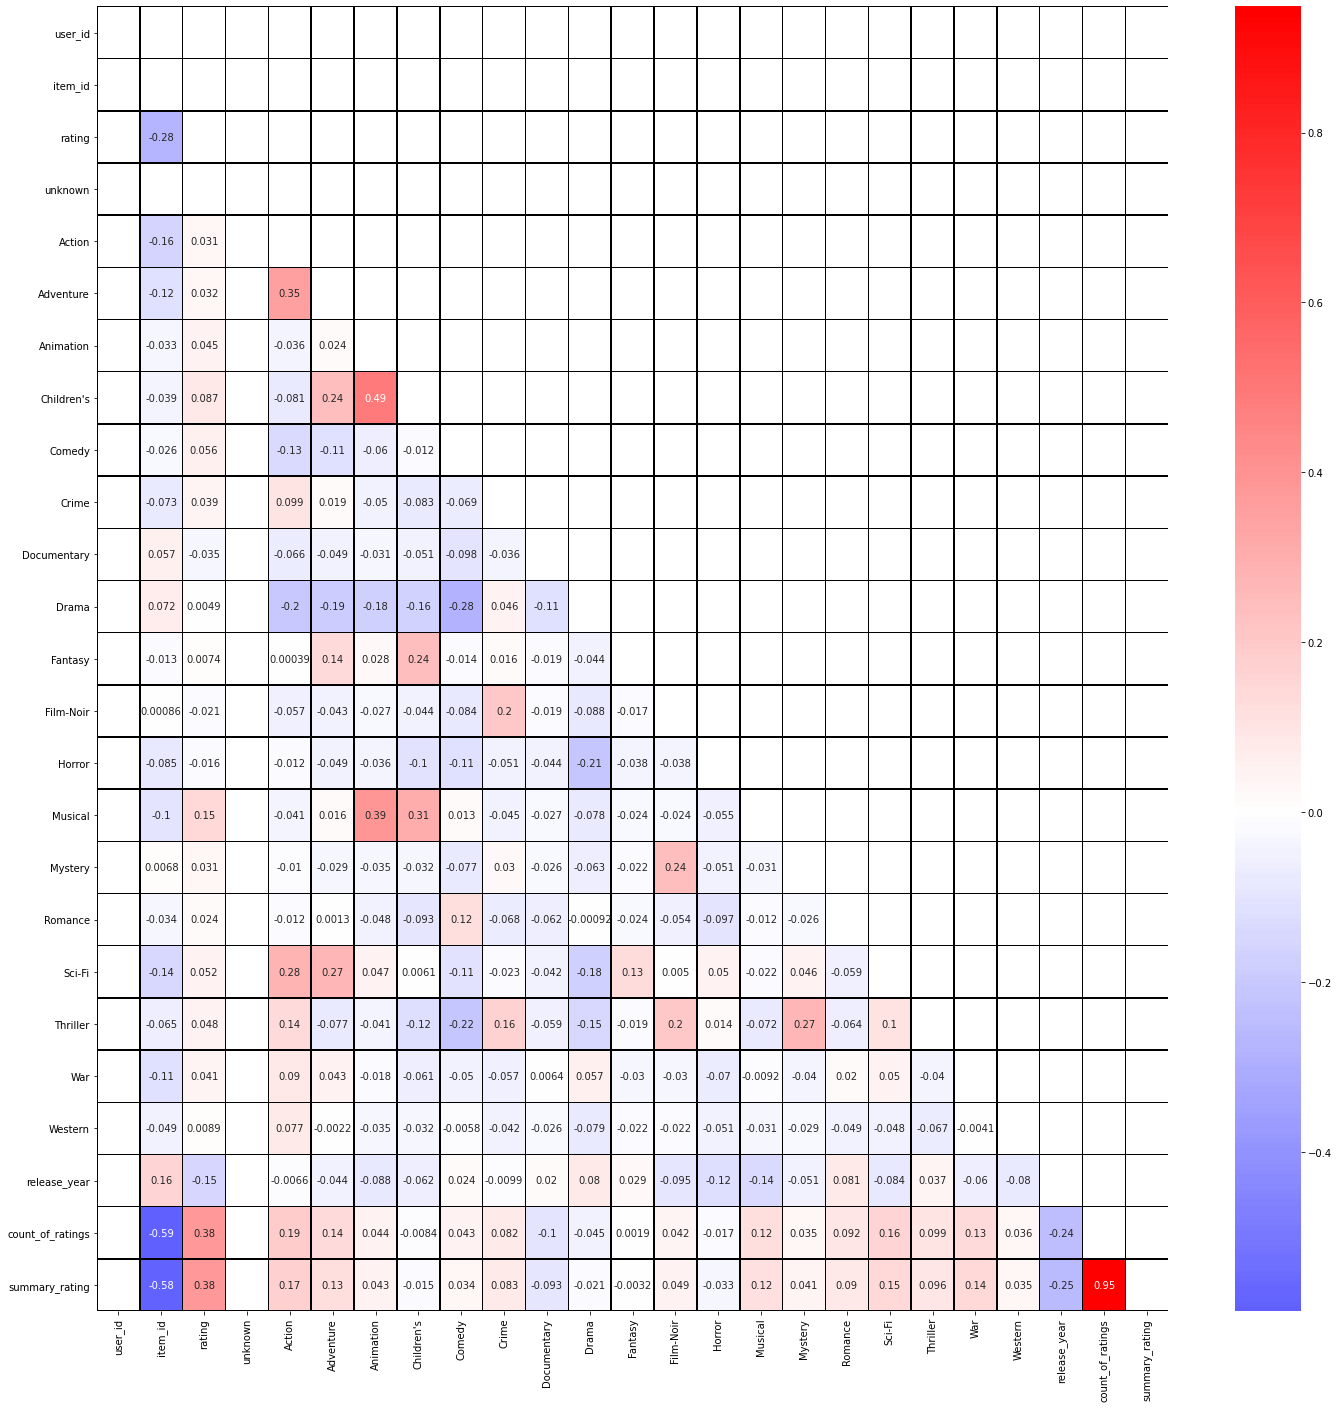

In [ ]:
# посмотрим матрицу корреляции признаков
plt.figure(figsize=(24, 24))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='bwr', mask=mask, center=0, linecolor='black', linewidths=0.5)

In [ ]:
ratings_top.columns

Index(['user_id', 'item_id', 'rating', 'movie_title', 'unknown', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'release_year', 'count_of_ratings', 'summary_rating'],
      dtype='object')

In [ ]:
X = ratings_top[['rating']]
y = ratings_top[['unknown', 'Action',
       'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'release_year','count_of_ratings',  'summary_rating']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Коэффициент детерминации R^2 достаточно скромно оценивает предсказательную силу нашей модели)
model.score(X_test, y_test)

0.3588721535386718

***8. Загрузить данные в spark***

In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [1,929 kB]
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz

In [ ]:
!tar -xvf spark-2.4.7-bin-hadoop2.7.tgz

spark-2.4.7-bin-hadoop2.7/
spark-2.4.7-bin-hadoop2.7/kubernetes/
spark-2.4.7-bin-hadoop2.7/kubernetes/tests/
spark-2.4.7-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-2.4.7-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-2.4.7-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/entrypoint.sh
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/Dockerfile
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-2.4.7-bin-hadoop2.7/kubernetes/dockerfiles/spark/Dockerfile
spark-2.4.7-bin-hadoop2.7/NOTICE
spark-2.4.7-bin-hadoop2.7/data/
spark-2.4.7-bin-hadoop2.7/data/strea

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
df = spark.read.csv('u.item.csv', sep='|', inferSchema=True, header=False)
df.show()

+---+--------------------+-----------+----+--------------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|_c0|                 _c1|        _c2| _c3|                 _c4|_c5|_c6|_c7|_c8|_c9|_c10|_c11|_c12|_c13|_c14|_c15|_c16|_c17|_c18|_c19|_c20|_c21|_c22|_c23|
+---+--------------------+-----------+----+--------------------+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|  1|    Toy Story (1995)|01-Jan-1995|null|http://us.imdb.co...|  0|  0|  0|  1|  1|   1|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|
|  2|    GoldenEye (1995)|01-Jan-1995|null|http://us.imdb.co...|  0|  1|  1|  0|  0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   0|   0|
|  3|   Four Rooms (1995)|01-Jan-1995|null|http://us.imdb.co...|  0|  0|  0|  0|  0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   0|   1|   0|   0|
|  4|   Get Shorty (1995)|01-Jan-1995|null|http://us.imdb.co...|  0|  

In [ ]:
# переименуем столбцы датафрейма
def renameCols(df, old_columns, new_columns):
    for old_col,new_col in zip(old_columns,new_columns):
        df = df.withColumnRenamed(old_col,new_col)
    return df

old_columns = ['_c0','_c1','_c2','_c3','_c4','_c5', '_c6','_c7','_c8','_c9','_c10','_c11','_c12','_c13',
               '_c14','_c15','_c16','_c17', '_c18','_c19','_c20','_c21','_c22','_c23']
new_columns = ["item_id",  "movie_title" , "release_date" , "video_release_date" ,
              "IMDb_URL" , "unknown" , "Action" , "Adventure" , "Animation" ,
              "Children's" , "Comedy" , "Crime" , "Documentary" , "Drama" , "Fantasy" ,
              "Film-Noir" , "Horror" , "Musical" , "Mystery" , "Romance" , "Sci-Fi" ,
              "Thriller" , "War" , "Western"]

In [ ]:
df_movies = renameCols(df, old_columns, new_columns)
df_movies.show()

+-------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|item_id|         movie_title|release_date|video_release_date|            IMDb_URL|unknown|Action|Adventure|Animation|Children's|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western|
+-------+--------------------+------------+------------------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|      1|    Toy Story (1995)| 01-Jan-1995|              null|http://us.imdb.co...|      0|     0|        0|        1|         1|     1|    0|          0|    0|      0|        0|     0|      0|      0|      0|     0|       0|  0|      0|
|      2|    GoldenEye (1995)| 01-Jan-1995|     

In [ ]:
df_rate = spark.read.csv('u.data.csv', sep="\t", inferSchema=True, header=False)
df_rate.show()

+---+----+---+---------+
|_c0| _c1|_c2|      _c3|
+---+----+---+---------+
|196| 242|  3|881250949|
|186| 302|  3|891717742|
| 22| 377|  1|878887116|
|244|  51|  2|880606923|
|166| 346|  1|886397596|
|298| 474|  4|884182806|
|115| 265|  2|881171488|
|253| 465|  5|891628467|
|305| 451|  3|886324817|
|  6|  86|  3|883603013|
| 62| 257|  2|879372434|
|286|1014|  5|879781125|
|200| 222|  5|876042340|
|210|  40|  3|891035994|
|224|  29|  3|888104457|
|303| 785|  3|879485318|
|122| 387|  5|879270459|
|194| 274|  2|879539794|
|291|1042|  4|874834944|
|234|1184|  2|892079237|
+---+----+---+---------+
only showing top 20 rows



In [ ]:
def renameCols(df, old_columns, new_columns):
    for old_col,new_col in zip(old_columns,new_columns):
        df = df.withColumnRenamed(old_col,new_col)
    return df
old_columns = ['_c0','_c1','_c2','_c3']
new_columns = ["user_id", "item_id", "rating", "timestamp"]

In [ ]:
df_ratings = renameCols(df_rate, old_columns, new_columns)
df_ratings.show(10)

+-------+-------+------+---------+
|user_id|item_id|rating|timestamp|
+-------+-------+------+---------+
|    196|    242|     3|881250949|
|    186|    302|     3|891717742|
|     22|    377|     1|878887116|
|    244|     51|     2|880606923|
|    166|    346|     1|886397596|
|    298|    474|     4|884182806|
|    115|    265|     2|881171488|
|    253|    465|     5|891628467|
|    305|    451|     3|886324817|
|      6|     86|     3|883603013|
+-------+-------+------+---------+
only showing top 10 rows



***9.Средствами спарка вывести среднюю оценку для каждого фильма***

In [ ]:
df_ratings = df_ratings.join(df_movies.select('item_id', 'movie_title', "unknown" , "Action" , "Adventure" , "Animation" ,
              "Children's" , "Comedy" , "Crime" , "Documentary" , "Drama" , "Fantasy" ,
              "Film-Noir" , "Horror" , "Musical" , "Mystery" , "Romance" , "Sci-Fi" ,
              "Thriller" , "War" , "Western"), on='item_id', how='left')
df_ratings.show()

+-------+-------+------+---------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|item_id|user_id|rating|timestamp|         movie_title|unknown|Action|Adventure|Animation|Children's|Comedy|Crime|Documentary|Drama|Fantasy|Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|Thriller|War|Western|
+-------+-------+------+---------+--------------------+-------+------+---------+---------+----------+------+-----+-----------+-----+-------+---------+------+-------+-------+-------+------+--------+---+-------+
|    242|    196|     3|881250949|        Kolya (1996)|      0|     0|        0|        0|         0|     1|    0|          0|    0|      0|        0|     0|      0|      0|      0|     0|       0|  0|      0|
|    302|    186|     3|891717742|L.A. Confidential...|      0|     0|        0|        0|         0|     0|    1|          0|    0|      0|        1|     0|   

In [ ]:
avg_ratings = df_ratings.groupby('item_id', 'movie_title').avg('rating')
avg_ratings.show()

+-------+--------------------+------------------+
|item_id|         movie_title|       avg(rating)|
+-------+--------------------+------------------+
|    171| Delicatessen (1991)| 3.876923076923077|
|    279|Once Upon a Time....|3.2857142857142856|
|    873|Picture Perfect (...| 2.962962962962963|
|    660|Fried Green Tomat...| 3.764705882352941|
|    708|Sex, Lies, and Vi...|3.4752475247524752|
|    170|Cinema Paradiso (...|4.1735537190082646|
|    394|Radioland Murders...|3.3333333333333335|
|   1512|World of Apu, The...|               4.0|
|    648|Quiet Man, The (1...| 4.029850746268656|
|    586|Terminal Velocity...| 2.676470588235294|
|    517|    Manhattan (1979)| 3.769230769230769|
|   1437|House Party 3 (1994)|               2.0|
|   1618|King of New York ...|               1.0|
|    961|      Orlando (1993)|3.6176470588235294|
|    923|Raise the Red Lan...| 4.155172413793103|
|     43|   Disclosure (1994)|               3.0|
|    981|Dangerous Ground ...|              1.75|


***10. Посчитайте средствами спарка среднюю оценку для каждого жанра***

In [ ]:
genre_unknown = df_ratings.where(df_ratings['unknown'] == 1)
avg_genre_unknown = genre_unknown.groupBy('unknown').avg('rating')
avg_genre_unknown.show()

+-------+-----------+
|unknown|avg(rating)|
+-------+-----------+
|      1|        3.2|
+-------+-----------+



In [ ]:
genre_action = df_ratings.where(df_ratings["Action"] == 1)
avg_genre_action = genre_action.groupBy('Action').avg('rating')
avg_genre_action.show()

+------+-----------------+
|Action|      avg(rating)|
+------+-----------------+
|     1|3.480245417953027|
+------+-----------------+



In [ ]:
genre_Adventure = df_ratings.where(df_ratings["Adventure"] == 1)
avg_genre_Adventure = genre_Adventure.groupBy('Adventure').avg('rating')
avg_genre_Adventure.show()

+---------+-----------------+
|Adventure|      avg(rating)|
+---------+-----------------+
|        1|3.503526503308369|
+---------+-----------------+



In [ ]:
genre_Animation = df_ratings.where(df_ratings["Animation"] == 1)
avg_genre_Animation = genre_Animation.groupBy('Animation').avg('rating')
avg_genre_Animation.show()


+---------+------------------+
|Animation|       avg(rating)|
+---------+------------------+
|        1|3.5766990291262135|
+---------+------------------+



In [ ]:
genre_Children = df_ratings.where(df_ratings["Children's"] == 1)
avg_genre_Children = genre_Children.groupBy("Children's").avg('rating')
avg_genre_Children.show()

+----------+------------------+
|Children's|       avg(rating)|
+----------+------------------+
|         1|3.3532442216652742|
+----------+------------------+



In [ ]:
genre_Comedy = df_ratings.where(df_ratings["Comedy"] == 1)
avg_genre_Comedy = genre_Comedy.groupBy("Comedy").avg('rating')
avg_genre_Comedy.show()

+------+------------------+
|Comedy|       avg(rating)|
+------+------------------+
|     1|3.3940734781442745|
+------+------------------+



In [ ]:
genre_Crime = df_ratings.where(df_ratings["Crime"] == 1)
avg_genre_Crime = genre_Crime.groupBy("Crime").avg('rating')
avg_genre_Crime.show()

+-----+------------------+
|Crime|       avg(rating)|
+-----+------------------+
|    1|3.6322780881440098|
+-----+------------------+



In [ ]:
genre_Documentary = df_ratings.where(df_ratings["Documentary"] == 1)
avg_genre_Documentary = genre_Documentary.groupBy("Documentary").avg('rating')
avg_genre_Documentary.show()

+-----------+------------------+
|Documentary|       avg(rating)|
+-----------+------------------+
|          1|3.6728232189973613|
+-----------+------------------+



In [ ]:
genre_Drama = df_ratings.where(df_ratings["Drama"] == 1)
avg_genre_Drama = genre_Drama.groupBy("Drama").avg('rating')
avg_genre_Drama.show()

+-----+------------------+
|Drama|       avg(rating)|
+-----+------------------+
|    1|3.6873793708484772|
+-----+------------------+



In [ ]:
genre_Fantasy = df_ratings.where(df_ratings["Fantasy"] == 1)
avg_genre_Fantasy = genre_Fantasy.groupBy("Fantasy").avg('rating')
avg_genre_Fantasy.show()

+-------+------------------+
|Fantasy|       avg(rating)|
+-------+------------------+
|      1|3.2152366863905324|
+-------+------------------+



In [ ]:
genre_Film_Noir = df_ratings.where(df_ratings["Film-Noir"] == 1)
avg_genre_Film_Noir = genre_Film_Noir.groupBy("Film-Noir").avg('rating')
avg_genre_Film_Noir.show()

+---------+------------------+
|Film-Noir|       avg(rating)|
+---------+------------------+
|        1|3.9215233698788228|
+---------+------------------+



In [ ]:
genre_Horror = df_ratings.where(df_ratings["Horror"] == 1)
avg_genre_Horror = genre_Horror.groupBy("Horror").avg('rating')
avg_genre_Horror.show()

+------+------------------+
|Horror|       avg(rating)|
+------+------------------+
|     1|3.2903893172841827|
+------+------------------+



In [ ]:
genre_Musical = df_ratings.where(df_ratings["Musical"] == 1)
avg_genre_Musical = genre_Musical.groupBy("Musical").avg('rating')
avg_genre_Musical.show()

+-------+-----------------+
|Musical|      avg(rating)|
+-------+-----------------+
|      1|3.521396851029471|
+-------+-----------------+



In [ ]:
genre_Mystery = df_ratings.where(df_ratings["Mystery"] == 1)
avg_genre_Mystery = genre_Mystery.groupBy("Mystery").avg('rating')
avg_genre_Mystery.show()

+-------+----------------+
|Mystery|     avg(rating)|
+-------+----------------+
|      1|3.63813155386082|
+-------+----------------+



In [ ]:
genre_Romance = df_ratings.where(df_ratings["Romance"] == 1)
avg_genre_Romance = genre_Romance.groupBy("Romance").avg('rating')
avg_genre_Romance.show()

+-------+-----------------+
|Romance|      avg(rating)|
+-------+-----------------+
|      1|3.621704948358255|
+-------+-----------------+



In [ ]:
genre_SciFi = df_ratings.where(df_ratings["Sci-Fi"] == 1)
avg_genre_SciFi = genre_SciFi.groupBy("Sci-Fi").avg('rating')
avg_genre_SciFi.show()

+------+------------------+
|Sci-Fi|       avg(rating)|
+------+------------------+
|     1|3.5607227022780834|
+------+------------------+



In [ ]:
genre_Thriller = df_ratings.where(df_ratings["Thriller"] == 1)
avg_genre_Thriller = genre_Thriller.groupBy("Thriller").avg('rating')
avg_genre_Thriller.show()

+--------+------------------+
|Thriller|       avg(rating)|
+--------+------------------+
|       1|3.5090069495245064|
+--------+------------------+



In [ ]:
genre_War = df_ratings.where(df_ratings["War"] == 1)
avg_genre_War = genre_War.groupBy("War").avg('rating')
avg_genre_War.show()

+---+-----------------+
|War|      avg(rating)|
+---+-----------------+
|  1|3.815811874866993|
+---+-----------------+



In [ ]:
genre_Western = df_ratings.where(df_ratings["Western"] == 1)
avg_genre_Western = genre_Western.groupBy("Western").avg('rating')
avg_genre_Western.show()

+-------+------------------+
|Western|       avg(rating)|
+-------+------------------+
|      1|3.6132686084142396|
+-------+------------------+



***11. В спарке получить 2 датафрейма с 5-ю самыми популярными и самыми непопулярными фильмами (по количеству оценок, либо по самой оценке - на Ваш выбор)***

In [ ]:
# Топ 5 по средней оценке пользователей
top = df_ratings.groupby('item_id', 'movie_title').avg('rating').orderBy('avg(rating)', ascending=False)
top.show(5)

+-------+--------------------+-----------+
|item_id|         movie_title|avg(rating)|
+-------+--------------------+-----------+
|   1653|Entertaining Ange...|        5.0|
|   1536|Aiqing wansui (1994)|        5.0|
|   1467|Saint of Fort Was...|        5.0|
|   1599|Someone Else's Am...|        5.0|
|   1293|     Star Kid (1997)|        5.0|
+-------+--------------------+-----------+
only showing top 5 rows



In [ ]:
# АнтиТоп 5 по средней оценке пользователей
antitop = df_ratings.groupby('item_id', 'movie_title').avg('rating').orderBy('avg(rating)', ascending=True)
antitop.show(5)

+-------+--------------------+-----------+
|item_id|         movie_title|avg(rating)|
+-------+--------------------+-----------+
|    314|3 Ninjas: High No...|        1.0|
|   1583|Invitation, The (...|        1.0|
|   1341|     Hedd Wyn (1992)|        1.0|
|   1618|King of New York ...|        1.0|
|   1572|Wend Kuuni (God's...|        1.0|
+-------+--------------------+-----------+
only showing top 5 rows

